In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(y_train)

60000

In [7]:
len(x_test)

10000

In [8]:
len(y_test)

10000

In [9]:
x_train[4414].shape

(28, 28)

In [10]:
x_train[4414]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 174, 253, 253, 174,
         68,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  15, 252, 252, 252, 252,
        236, 171,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,  88,  88, 193, 245,
        252, 236,  67,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

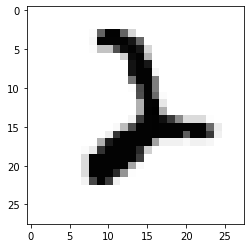

In [11]:
plt.imshow(x_train[4414],cmap='Greys')

In [12]:
y_train[4414]

2

## 輸入端必須被拉平

In [13]:
x_train = x_train.reshape(60000,28*28)

In [14]:
x_test = x_test.reshape(10000,28*28)

In [15]:
x_train[4414].shape

(784,)

## One-Hot Enconding
y值必須是連續的數字，然而1跟2之間有1.5等等的小數點存在，當電腦識別出1.5時會因不知道到底是1還是2，然而1跟2之間卻根本不應該辨識錯誤，長相差很多

所以我們將y改成10維向量，ex:1 => [0,1,0,0,0,0,0,0,0,0]

每個向量代表的都是他代表這個數字的機率，最小為0，最大值為1，相加總合則必須是1

In [16]:
from keras.utils import np_utils

In [17]:
y_train = np_utils.to_categorical(y_train,10)

In [18]:
y_test = np_utils.to_categorical(y_test,10)

In [19]:
y_train[4414]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 建構神經網路

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [21]:
model = Sequential()

In [22]:
model.add(Dense(500,input_dim=784))
model.add(Activation('sigmoid'))

In [23]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [24]:
model.add(Dense(10))
model.add(Activation('softmax'))

## 組裝神經網路

In [25]:
model.compile(loss='mse',optimizer=SGD(lr=0.1),metrics=['accuracy'])

## summary
可以看到組裝好的神經網路

Param = （輸入數據維度+1）* 神經元個數

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
__________________________________________________

## 將神經網路畫成圖

In [27]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model01.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


![我的神經網路](model01.png)

## 訓練神經網路

In [28]:
model.fit(x_train, y_train, batch_size = 100, epochs = 100)

Epoch 1/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0828 - accuracy: 0.3923
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0630 - accuracy: 0.5945
Epoch 3/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0462 - accuracy: 0.7433
Epoch 4/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0344 - accuracy: 0.8245
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0267 - accuracy: 0.8655
Epoch 6/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0221 - accuracy: 0.8838
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0192 - accuracy: 0.8951
Epoch 8/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0173 - accuracy: 0.9026
Epoch 9/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0158 - accuracy: 0.9097
Epoch 10/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0147 - accura

Epoch 81/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0038 - accuracy: 0.9776
Epoch 82/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0037 - accuracy: 0.9778
Epoch 83/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0037 - accuracy: 0.9779
Epoch 84/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0037 - accuracy: 0.9781
Epoch 85/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0037 - accuracy: 0.9783
Epoch 86/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0036 - accuracy: 0.9784
Epoch 87/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0036 - accuracy: 0.9786
Epoch 88/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0036 - accuracy: 0.9788
Epoch 89/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0036 - accuracy: 0.9789
Epoch 90/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0035

In [29]:
from ipywidgets import interact_manual

## predict_class
讓系統從10個種類中選出機率最大的

In [30]:
predict = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
def test(test_num):
    plt.imshow(x_test[test_num].reshape(28,28), cmap = 'Greys')
    print('Ans:{},AI:{}'.format(
        y_test[test_num],
        predict[test_num]))

In [32]:
interact_manual(test,test_num = (0,9999))

interactive(children=(IntSlider(value=4999, description='test_num', max=9999), Button(description='Run Interac…

<function __main__.test(test_num)>

In [33]:
model_json = model.to_json()
open('nn_write_architecture.json','w').write(model_json)
model.save_weights('nn_write_weight.h5')